In [1]:
from utils import *
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("light")

In [16]:
class GuidewireExperiment:
    def __init__(self, positions):
        self.positions = positions
        self.timesteps = len(positions)

    def get_sphere_position(self, idx):
        sphere_pos = np.array([np.array([
            self.positions[str(i)]["sphere"][str(idx)]["x"], 
            self.positions[str(i)]["sphere"][str(idx)]["y"], 
            self.positions[str(i)]["sphere"][str(idx)]["z"]]) for i in range(0, self.timesteps)])
        return sphere_pos - sphere_pos[0]

    def get_total_time(self):
        total_time = [self.positions[str(i)]["totalTime"] for i in range(0, self.timesteps)]
        return total_time
    
    def get_elapsed_time(self):
        elapsed_time = [self.positions[str(i)]["elapsedMilliseconds"] for i in range(0, self.timesteps)]
        return elapsed_time
    
    def get_delta(self):
        delta = np.array([self.positions[str(i)]["delta"] for i in range(0, self.timesteps)])
        return delta 
    
    def plot_sphere(self, idx, axis=0):
        sphere_pos = self.get_sphere_position(idx)
        
        plt.figure(figsize=(5,5), dpi=70)
        plt.plot(sphere_pos[:,axis])
        plt.show()
        
    def plot_all_spheres(self, axis=0):
        num_spheres = len(self.positions["0"]["sphere"])
        sphere_matrix = np.array([self.get_sphere_position(i) for i in range(0, num_spheres)])[:,:,axis]
        #sphere_matrix -= np.min(sphere_matrix)
        
        plt.figure(figsize=(6,5), dpi=70)
        plt.imshow(sphere_matrix, aspect="auto", cmap="turbo")
        plt.xlabel("Timestep")
        plt.ylabel("Sphere Index")
        plt.colorbar()
        plt.show()
        
        plt.plot(sphere_matrix[-1])

    def plot_experiment(self):
        fig,ax = plt.subplots(3,1, figsize=(7,7), dpi=70)
        ax[0].plot(self.get_total_time())
        ax[0].set_title("Total Time")
        ax[1].plot(self.get_elapsed_time())
        ax[1].set_title("Elapsed Time")
        ax[2].plot(self.get_delta())
        ax[2].set_title("Delta")
        plt.tight_layout()
        plt.show()


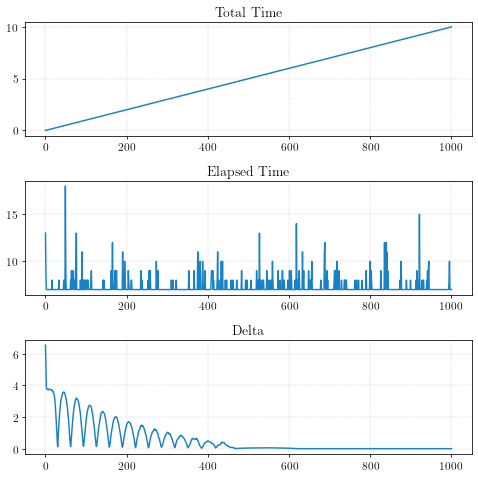

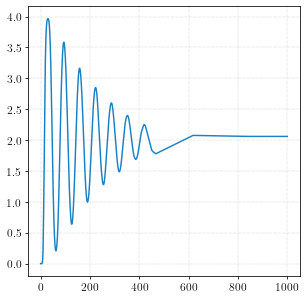

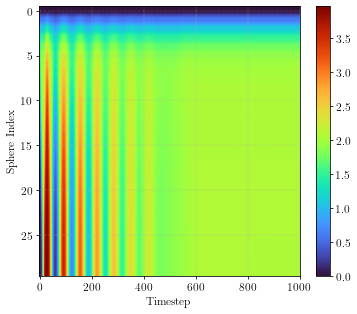

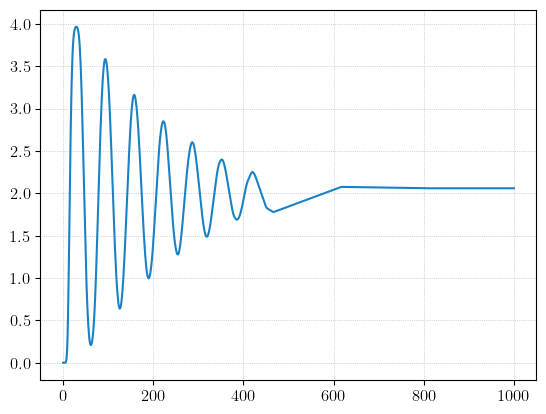

In [24]:
positions = read_json_file("/home/max/Temp/Praktikum/experiments/solver_steps_500/positions.json")

experiment1 = GuidewireExperiment(positions)

experiment1.plot_experiment()
experiment1.plot_sphere(29, axis=2)
experiment1.plot_all_spheres(axis=2)